# SyriaTel Customer Churn Prediction Model

## Intial Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display= 'diagram')

from imblearn.over_sampling import SMOTE, ADASYN

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_original = pd.read_csv('/Users/Arsh/Downloads/bigml_59c28831336c6604c800002a.csv')

In [3]:
from copy import deepcopy
df = deepcopy(df_original)

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.shape

(3333, 21)

In [6]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [7]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
(df.state.value_counts())

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NJ     68
NC     68
NV     66
WA     66
CO     66
RI     65
MS     65
MA     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
NE     61
DE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [9]:
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [10]:
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [11]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [12]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

<AxesSubplot:>

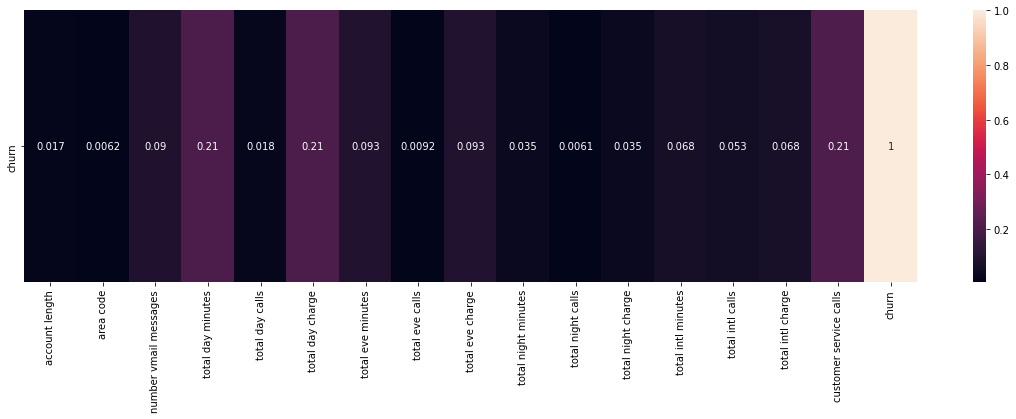

In [13]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr().abs().loc[['churn'],:], annot = True)

In [14]:
#sns.pairplot(df, corner = True)

[Text(0.5, 1.0, 'Churn and Customer Service Calls')]

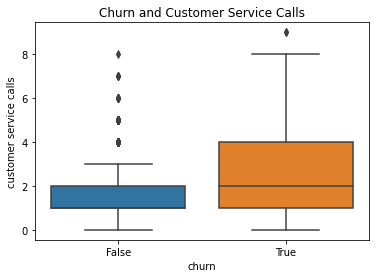

In [15]:
sns.boxplot( x=df["churn"], y=df["customer service calls"]).set(title='Churn and Customer Service Calls')

In [138]:
df

,state,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international_plan,voice_mail_plan,churn_num
0,KS,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,OH,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,OH,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,OK,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,1,0
3329,WV,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0,0
3330,RI,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0,0
3331,CT,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,1,0,0


[Text(0.5, 1.0, 'Churn and Total Day Charge')]

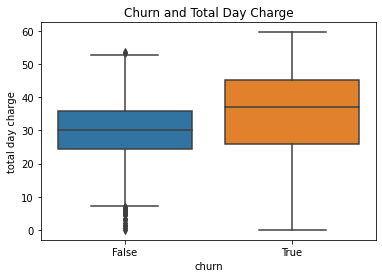

In [139]:
sns.boxplot( x=df2["churn"], y=df2["total day charge"]).set(title='Churn and Total Day Charge')

In [ ]:
sns.boxplot( x=df2["churn"], y=df2["total day charge"]).set(title='Churn and Total Day Charge')

In [146]:
churn_numbers = df_original['churn'].value_counts()
churn_numbers

False    2850
True      483
Name: churn, dtype: int64

<AxesSubplot:title={'center':'Customer Churn Numbers'}, ylabel='Number'>

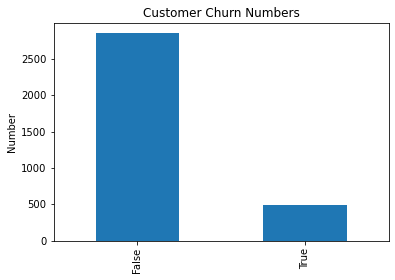

In [152]:
plt.title("Customer Churn Numbers")
plt.ylabel("Number")
churn_numbers.plot.bar()


In [16]:
# Clearly there is little collinearity between customer churn and the other variables in the spreadsheet. 

## Baseline Model 

In [17]:
# This baseline will just use the numerical columns provided. Encoding the nominal columns, such as state and area code will be done later. 

In [18]:
df_base = df.drop(columns = ['state', 'area code', 'phone number', 'international plan', 'voice mail plan'])

In [19]:
y1 = df_base['churn']
X1 = df_base.drop('churn', axis=1)

# Split into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=20)

In [20]:
steps = [('std_scaler', StandardScaler()),
        ('logreg', LogisticRegression(random_state=15))]

pipeline = Pipeline(steps)


# Train the pipeline (tranformations & predictor)
pipeline.fit(X_train1, y_train1)

# Predict using the pipeline (includes the transfomers & trained predictor)
predicted1 = pipeline.predict(X_test1)
predicted1

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [21]:
print(classification_report(y_test1, predicted1))

              precision    recall  f1-score   support

       False       0.87      0.99      0.92       858
        True       0.56      0.11      0.18       142

    accuracy                           0.86      1000
   macro avg       0.71      0.55      0.55      1000
weighted avg       0.82      0.86      0.82      1000



In [142]:
sum(y_test1)

142

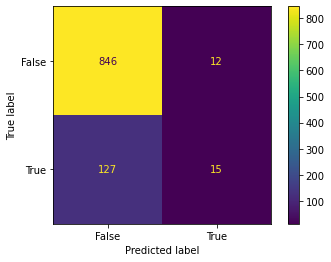

In [22]:
plot_confusion_matrix(pipeline, X_test1, y_test1)

In [23]:
y_test1.sum() # Number of true values in y_test, which has a 1000 rows and are booolean values.

142

In [24]:
# Ah. This makes sense, because of class imbalance, the model has trouble predicting True values

In [25]:
# Time to do some data wrangling. 

# Data Wrangling

In [26]:
# First I will convert all my object columns into numerical columns.

In [27]:
df.loc[df['international plan'] == 'no', 'international_plan'] = 0
df.loc[df['international plan'] == 'yes', 'international_plan'] = 1
df['international_plan'] = df['international_plan'].astype(int)
df.loc[df['voice mail plan'] == 'no', 'voice_mail_plan'] = 0
df.loc[df['voice mail plan'] == 'yes', 'voice_mail_plan'] = 1
df['voice_mail_plan'] = df['voice_mail_plan'].astype(int)
df.loc[df['churn'] == False, 'churn_num'] = 0
df.loc[df['churn'] == True, 'churn_num'] = 1
df['churn_num'] = df['churn_num'].astype(int)

In [28]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international_plan,voice_mail_plan,churn_num
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,False,0,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,False,1,0,0


In [29]:
# now the converted columns can be removed. 
df.drop(columns = ['phone number', 'international plan', 'voice mail plan', 'churn'], inplace = True)

In [30]:
df.info()
# This is misleading, technically area code is a nominal category even though it has integer values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [31]:
df['area code'] = df['area code'].astype(object) # Converting this column to an object so it can be run through a pipeline for nominal columns.

In [32]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [33]:
df['area code'].dtypes #Sanity check

dtype('O')

In [34]:
y = df['churn_num']
X = df.drop('churn_num', axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3333)

In [35]:
numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', StandardScaler())])


In [36]:
num_cols = X_train.select_dtypes(['int', 'float']).columns
ct = ColumnTransformer([("nominalpipe", nominal_pipeline, ['area code','state']),
     ("numpipe", numeric_pipeline, num_cols)])

num_cols

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'international_plan', 'voice_mail_plan'],
      dtype='object')

In [37]:
X_train_scaled = pd.DataFrame(ct.fit_transform(X_train)).head()
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,1.018604,-0.577185,-0.150987,-0.119782,-0.14799,-0.097569,-0.138645,-0.163855,-0.133747,-0.12519,...,-1.387634,-0.284281,-0.702809,-0.283001,-0.106191,1.041577,-0.110941,-1.196426,-0.32105,-0.608884
1,-0.981736,-0.577185,-0.150987,-0.119782,-0.14799,-0.097569,-0.138645,-0.163855,-0.133747,-0.12519,...,0.289915,1.062765,-0.193853,1.063347,-1.413158,-0.990535,-1.415223,3.375665,-0.32105,-0.608884
2,-0.981736,1.732546,-0.150987,-0.119782,-0.14799,-0.097569,-0.138645,-0.163855,-0.133747,-0.12519,...,-0.750119,1.237273,0.925851,1.237631,-1.304244,0.635155,-1.307653,0.327604,-0.32105,-0.608884
3,1.018604,-0.577185,-0.150987,-0.119782,-0.14799,-0.097569,-0.138645,-0.163855,-0.133747,-0.12519,...,-0.470915,1.070608,-0.092062,1.072061,0.692511,-0.177690,0.695831,-0.434411,-0.32105,-0.608884
4,1.018604,-0.577185,-0.150987,-0.119782,-0.14799,-0.097569,-0.138645,-0.163855,-0.133747,-0.12519,...,0.173580,0.319635,0.315104,0.318280,0.801425,-0.990535,0.803400,1.089620,-0.32105,-0.608884


In [38]:
X_test_scaled = pd.DataFrame(ct.transform(X_test)).head()
X_test_scaled

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,-0.981736,-0.577185,-0.150987,-0.119782,-0.14799,-0.097569,-0.138645,-0.163855,-0.133747,-0.12519,...,-0.505816,0.098069,1.027643,0.096068,-1.413158,-0.177690,-1.415223,0.327604,-0.32105,-0.608884
1,1.018604,-0.577185,-0.150987,-0.119782,-0.14799,10.249168,-0.138645,-0.163855,-0.133747,-0.12519,...,-0.289433,0.952962,-1.109974,0.954419,-3.700350,-1.803380,-3.701077,-0.434411,-0.32105,1.642348
2,1.018604,-0.577185,-0.150987,-0.119782,-0.14799,-0.097569,-0.138645,-0.163855,-0.133747,-0.12519,...,1.118219,-1.368584,1.180330,-1.367923,-1.594681,-0.990535,-1.590023,-0.434411,-0.32105,-0.608884
3,1.018604,-0.577185,-0.150987,-0.119782,-0.14799,-0.097569,7.212678,-0.163855,-0.133747,-0.12519,...,0.797135,0.854924,0.518686,0.854205,0.147942,-0.584113,0.144537,-0.434411,-0.32105,1.642348
4,1.018604,-0.577185,-0.150987,-0.119782,-0.14799,-0.097569,-0.138645,-0.163855,-0.133747,-0.12519,...,-0.554677,0.331400,1.129434,0.331352,-0.033581,-0.177690,-0.030264,-1.196426,-0.32105,-0.608884


In [39]:
ct

ColumnTransformer(transformers=[('nominalpipe',
                                 Pipeline(steps=[('onehotenc',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False)),
                                                 ('onehotnorm',
                                                  StandardScaler())]),
                                 ['area code', 'state']),
                                ('numpipe',
                                 Pipeline(steps=[('numnorm',
                                                  StandardScaler())]),
                                 Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'international_plan', 'voice_mail_plan'],
      dtype='object'))])

In [40]:
final_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       RandomForestClassifier())])
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   StandardScaler())]),
                                                  ['area code', 'state']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'international_plan', 'voice_mail_plan'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

In [41]:
final_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   StandardScaler())]),
                                                  ['area code', 'state']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'international_plan', 'voice_mail_plan'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

In [42]:
len(X_test_scaled.columns)

69

In [43]:
y_pred = final_pipe.predict(X_test)

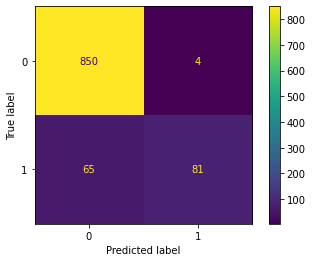

In [44]:
plot_confusion_matrix(final_pipe, X_test, y_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       854
           1       0.95      0.55      0.70       146

    accuracy                           0.93      1000
   macro avg       0.94      0.78      0.83      1000
weighted avg       0.93      0.93      0.92      1000



In [46]:
# Much better than I expected, though the Random Forest model is having trouble prediciting True or 1 values in the target column.

In [47]:
rf_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       RandomForestClassifier(n_estimators = 100, random_state=25))])

In [48]:
rf_pipe.fit(X_train, y_train);

In [49]:
y_rf_pred = rf_pipe.predict(X_test)

In [50]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       854
           1       0.92      0.58      0.71       146

    accuracy                           0.93      1000
   macro avg       0.93      0.79      0.84      1000
weighted avg       0.93      0.93      0.93      1000



In [52]:
rf_params = {'model__n_estimators': [20, 30, 40, 50, 100], 
             'model__min_samples_leaf': [1, 3, 5], 
             'model__max_depth': [4, 6, 8, 10, 12], 
             'model__min_samples_split': [1, 2, 5, 10, 12]} 
rf_cv = GridSearchCV(estimator = rf_pipe, param_grid = rf_params, cv = 5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('onehotenc',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('onehotnorm',
                                                                                          StandardScaler())]),
                                                                         ['area '
                                                                          'code',
                                                                          'state']),
                                                                        ('numpipe',
                                                                         Pipeline(steps=[('numnorm',
                                                                                          StandardScaler())]),
                                                                         Index(['account length', 'number vmail messages', 'total day minu...
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'international_plan', 'voice_mail_plan'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(random_state=25))]),
             param_grid={'model__max_depth': [4, 6, 8, 10, 12],
                         'model__min_samples_leaf': [1, 3, 5],
                         'model__min_samples_split': [1, 2, 5, 10, 12],
                         'model__n_estimators': [20, 30, 40, 50, 100]})

In [53]:
rf_cv.best_score_

0.9207056271884276

In [54]:
rf_cv.best_params_

{'model__max_depth': 12,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 40}

In [55]:
print ({'model__max_depth': 12,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 40})

{'model__max_depth': 12, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 40}


In [56]:
best_rf_model = rf_cv.best_estimator_
best_rf_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   StandardScaler())]),
                                                  ['area code', 'state']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'international_plan', 'voice_mail_plan'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=12, n_estimators=40,
                                        random_state=25))])

In [57]:
best_rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   StandardScaler())]),
                                                  ['area code', 'state']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'international_plan', 'voice_mail_plan'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=12, n_estimators=40,
                                        random_state=25))])

In [58]:
y_rfcv_pred = best_rf_model.predict(X_test)
print(classification_report(y_test,y_rfcv_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       854
           1       0.95      0.48      0.64       146

    accuracy                           0.92      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.92      0.92      0.91      1000



In [59]:
feat_imp = best_rf_model['model'].feature_importances_

feat_imp_series = pd.Series(feat_imp, 
          index = X_test_scaled.columns).sort_values(
    ascending = False)

In [60]:
feat_imp_series.head(30)

56    0.146760
54    0.143319
66    0.106887
59    0.057134
67    0.055481
64    0.045937
57    0.045602
63    0.040062
62    0.035990
60    0.035594
65    0.034064
61    0.031427
52    0.030924
55    0.028741
68    0.025277
58    0.025012
53    0.023215
0     0.006586
1     0.005488
32    0.003260
5     0.003188
26    0.003172
21    0.003157
48    0.002757
31    0.002587
17    0.002250
44    0.002222
35    0.002177
27    0.002125
34    0.002099
dtype: float64

<AxesSubplot:>

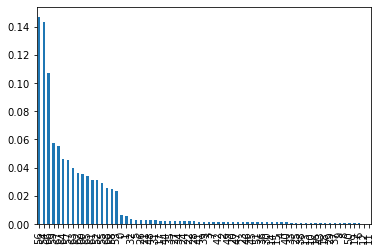

In [61]:
figsize = (20,20)
feat_imp_series.plot(kind = 'bar')

In [62]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [63]:
model = RandomForestClassifier(max_depth=12, n_estimators=40, random_state=25)
over = SMOTE(sampling_strategy=0.25)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('preprocess', ct), ('over', over), ('under', under), ('model', model)]
newpipeline = Pipeline(steps=steps)

In [64]:
newpipeline.fit(X_train, y_train);
y_rfn_pred = newpipeline.predict(X_test)
print(classification_report(y_test, y_rfn_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       854
           1       0.80      0.67      0.73       146

    accuracy                           0.93      1000
   macro avg       0.87      0.82      0.84      1000
weighted avg       0.92      0.93      0.92      1000



In [65]:
y_test.value_counts()

0    854
1    146
Name: churn_num, dtype: int64

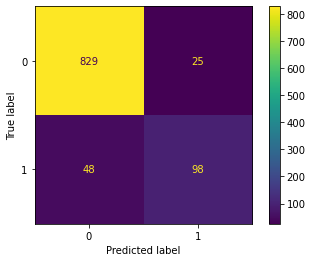

In [66]:
plot_confusion_matrix(newpipeline, X_test, y_test)

### Testing an idea that Categorical Features have little predictive effect on customer churn

In [71]:
df2 = deepcopy(df_original)

In [72]:
df2

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [73]:
df2.drop(columns=['state', 'area code', 'phone number'], inplace = True)
df2.loc[df2['international plan'] == 'no', 'international_plan'] = 0
df2.loc[df2['international plan'] == 'yes', 'international_plan'] = 1
df2['international_plan'] = df2['international_plan'].astype(int)
df2.loc[df2['voice mail plan'] == 'no', 'voice_mail_plan'] = 0
df2.loc[df2['voice mail plan'] == 'yes', 'voice_mail_plan'] = 1
df2['voice_mail_plan'] = df2['voice_mail_plan'].astype(int)

In [74]:
df2.drop(columns=['international plan', 'voice mail plan'], inplace = True)

In [75]:
df2

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international_plan,voice_mail_plan
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,0,1
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,0,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,0,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,1,0


In [76]:
df2.dtypes

account length              int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
international_plan          int64
voice_mail_plan             int64
dtype: object

In [77]:
y2 = df2['churn']
X2 = df2.drop('churn', axis=1)

# Split into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, stratify = y2, test_size=0.30, random_state=15)

In [78]:
steps = [('std_scaler', StandardScaler()),
        ('logreg', LogisticRegression(random_state=15))]

pipeline2 = Pipeline(steps)


# Train the pipeline (tranformations & predictor)
pipeline2.fit(X_train2, y_train2)

# Predict using the pipeline (includes the transfomers & trained predictor)
predicted2 = pipeline2.predict(X_test2)
predicted2

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [79]:
steps = [('std_scaler', StandardScaler()),
        ('pipeline3', RandomForestClassifier(random_state=20))]

pipeline3 = Pipeline(steps)


# Train the pipeline (tranformations & predictor)
pipeline3.fit(X_train2, y_train2)

# Predict using the pipeline (includes the transfomers & trained predictor)
predicted3 = pipeline3.predict(X_test2)
predicted3
pipeline3.score(X_test2,y_test2)

0.957

In [80]:
print(classification_report(y_test2, predicted3))

              precision    recall  f1-score   support

       False       0.96      0.99      0.98       855
        True       0.95      0.74      0.83       145

    accuracy                           0.96      1000
   macro avg       0.95      0.87      0.90      1000
weighted avg       0.96      0.96      0.95      1000



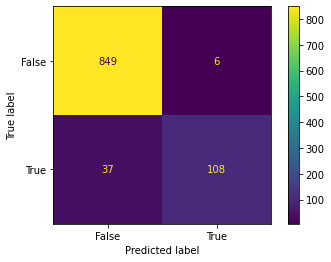

In [81]:
plot_confusion_matrix(pipeline3, X_test2, y_test2)

In [82]:
pipeline3

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('pipeline3', RandomForestClassifier(random_state=20))])

In [103]:
rf_params = {'pipeline3__n_estimators': [50, 100, 150, 200, 250], 
             'pipeline3__min_samples_leaf': [1, 3, 5, 9], 
             'pipeline3__max_features': [4, 5, 6, 8]} 
rf_cv = GridSearchCV(estimator = pipeline3, param_grid = rf_params, cv = 5)
rf_cv.fit(X_train2, y_train2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('pipeline3',
                                        RandomForestClassifier(random_state=20))]),
             param_grid={'pipeline3__max_features': [4, 5, 6, 8],
                         'pipeline3__min_samples_leaf': [1, 3, 5, 9],
                         'pipeline3__n_estimators': [50, 100, 150, 200, 250]})

In [104]:
rf_cv.best_score_

0.9524193326042404

In [105]:
rf_cv.best_params_

{'pipeline3__max_features': 8,
 'pipeline3__min_samples_leaf': 1,
 'pipeline3__n_estimators': 250}

In [107]:
best_rf_model = rf_cv.best_estimator_
best_rf_model

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('pipeline3',
                 RandomForestClassifier(max_features=8, n_estimators=250,
                                        random_state=20))])

In [121]:
best_rf_model.fit(X_train2, y_train2)
best_rf_model

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('pipeline3',
                 RandomForestClassifier(max_features=8, n_estimators=250,
                                        random_state=20))])

In [122]:
y_rfcv_pred = best_rf_model.predict(X_test2)
print(classification_report(y_test2, y_rfcv_pred))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       855
        True       0.93      0.75      0.83       145

    accuracy                           0.96      1000
   macro avg       0.95      0.87      0.90      1000
weighted avg       0.96      0.96      0.95      1000



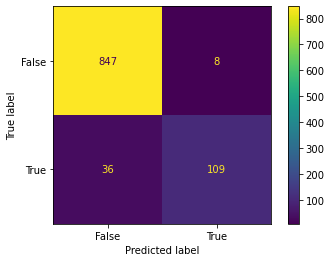

In [123]:
plot_confusion_matrix(best_rf_model, X_test2, y_test2)

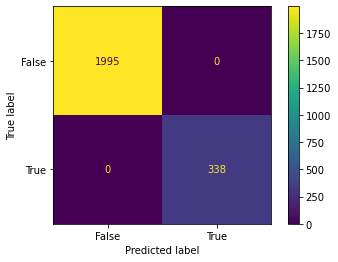

In [124]:
plot_confusion_matrix(best_rf_model, X_train2, y_train2)

In [126]:
feat_imp = best_rf_model['pipeline3'].feature_importances_

In [176]:
feat_imp_series = pd.Series(feat_imp, 
          index = X_train2.columns).sort_values(
    ascending = False)
feat_imp_series

total day minutes         0.148842
total day charge          0.142294
customer service calls    0.110177
international_plan        0.081728
total eve charge          0.072163
total eve minutes         0.072007
total intl calls          0.064046
total intl minutes        0.044170
total intl charge         0.042857
total night minutes       0.033818
total night charge        0.033759
number vmail messages     0.032973
account length            0.027286
voice_mail_plan           0.025617
total day calls           0.024184
total night calls         0.022228
total eve calls           0.021851
dtype: float64

<AxesSubplot:>

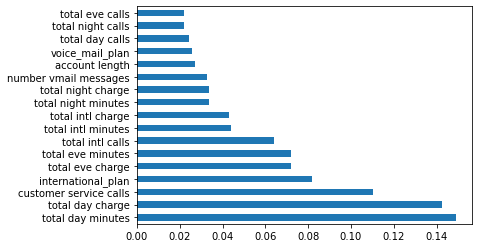

In [129]:
feat_imp_series.plot(kind = 'barh')

In [111]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(max_features='sqrt',
                         max_samples=0.5,
                         bootstrap=True,
                         random_state=1)

In [112]:
etc.fit(X_train2, y_train2)

ExtraTreesClassifier(bootstrap=True, max_features='sqrt', max_samples=0.5,
                     random_state=1)

In [113]:
etc.score(X_test2, y_test2)

0.92

In [114]:
y_etc_pred = etc.predict(X_test2)
print(classification_report(y_test2, y_etc_pred))

              precision    recall  f1-score   support

       False       0.92      0.99      0.96       855
        True       0.93      0.48      0.64       145

    accuracy                           0.92      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.92      0.92      0.91      1000



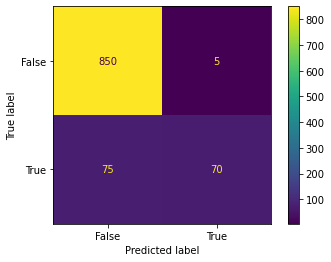

In [115]:
plot_confusion_matrix(etc, X_test2, y_test2)

In [99]:
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score
scores = cross_val_score(estimator=etc, X=X_train2,
               y=y_train2, cv=5)
scores

array([0.92077088, 0.9143469 , 0.90578158, 0.93562232, 0.91201717])

In [100]:
np.median(scores)

0.9143468950749465

In [101]:
np.mean(scores)

0.9177077685160508

In [102]:
df2.shape

(3333, 18)

In [132]:
gs_pipe = GridSearchCV(estimator=pipeline3, 
                       param_grid=rf_params, scoring = 'recall')

In [133]:
gs_pipe.fit(X_train2, y_train2);

In [134]:
best_est = gs_pipe.best_estimator_
best_est

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('pipeline3',
                 RandomForestClassifier(max_features=8, n_estimators=250,
                                        random_state=20))])

In [135]:
y_est_pred = best_est.predict(X_test2)
print(classification_report(y_test2, y_est_pred))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       855
        True       0.93      0.75      0.83       145

    accuracy                           0.96      1000
   macro avg       0.95      0.87      0.90      1000
weighted avg       0.96      0.96      0.95      1000



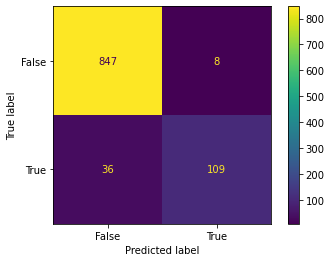

In [136]:
plot_confusion_matrix(best_est, X_test2, y_test2)

In [130]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_cv = RandomizedSearchCV(estimator = regress_pipe, param_distributions = params, n_iter = 10, cv = 6)


In [153]:
df.head()

,state,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international_plan,voice_mail_plan,churn_num
0,KS,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,OH,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,OH,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,OK,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0


In [157]:
day_cost = df2['total day charge'].sum() / df2['total day minutes'].sum()
day_cost

0.17000300739130672

In [160]:
eve_cost = df2['total eve charge'].sum() / df2['total eve minutes'].sum()
eve_cost

0.0850010487148578

In [161]:
night_cost = df2['total night charge'].sum() / df2['total night minutes'].sum()
night_cost

0.04500041448440008

In [171]:
cost_info1 = {'Day Charge': 0.17000300739130672, 'Eve Charge': 0.0850010487148578, 'Night Charge': 0.04500041448440008}
cost_info2 = pd.DataFrame.from_dict(cost_info1, orient='index')
cost_info2

,0
Day Charge,0.170003
Eve Charge,0.085001
Night Charge,0.045000


Text(0, 0.5, 'Cost (in cents)')

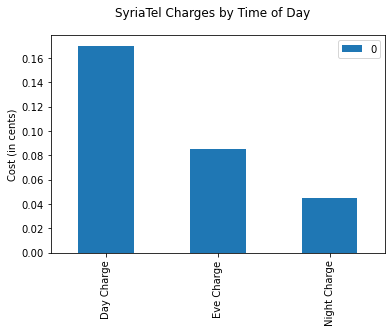

In [174]:
cost_info2.plot.bar()
plt.suptitle("SyriaTel Charges by Time of Day")
plt.ylabel("Cost (in cents)")